<a href="https://colab.research.google.com/github/Sisterno/ML_RedesNeuronales/blob/master/Modelo_entrenamiento__D006_D012.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from time import time
import pathlib

path_img_leucocitos = "/content/drive/MyDrive/ML/04-dataset-preprocesado-fusion";
pathlib_img_leucocitos=pathlib.Path(path_img_leucocitos)

from google.colab import drive
drive.mount('/content/drive')

batch_size = 32
img_height = 180
img_width = 180

#-------------------------------------------------------------------------------
def obtenerTimer():
  class TimingCallback(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []
    def on_epoch_begin(self, batch, logs={}):
        self.epoch_time_start = time()
    def on_epoch_end(self, batch, logs={}):
        self.times.append(time() - self.epoch_time_start)
  cb = TimingCallback()
  return cb

#-------------------------------------------------------------------------------

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  path_img_leucocitos,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),batch_size=batch_size
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  path_img_leucocitos,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size
)

AUTOTUNE = tf.data.AUTOTUNE

# train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
# val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 59877 files belonging to 5 classes.
Using 47902 files for training.
Found 59877 files belonging to 5 classes.
Using 11975 files for validation.


## Modelos

### Modelo DS002-D006

In [ ]:
#-------------------------------------------------------------------------------
cb_D006 = obtenerTimer()
num_classes = 5
epochs=15

model_D006 = Sequential([
  layers.Conv2D(8, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(32, activation='relu'),
  layers.Dense(num_classes)
])
model_D006.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# model_D006.summary()


history_D006 = model_D006.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[cb_D006]
)

#-------------------------------------------------------------------------------

Epoch 1/15
1497/1497 [==============================] - 120s 80ms/step - loss: 2.8256 - accuracy: 0.3212 - val_loss: 1.5610 - val_accuracy: 0.3240
Epoch 2/15
1497/1497 [==============================] - 121s 81ms/step - loss: 1.5552 - accuracy: 0.3270 - val_loss: 1.5687 - val_accuracy: 0.3240
Epoch 3/15
1497/1497 [==============================] - 125s 83ms/step - loss: 1.5558 - accuracy: 0.3270 - val_loss: 1.5643 - val_accuracy: 0.3240
Epoch 4/15
1497/1497 [==============================] - 124s 82ms/step - loss: 1.5551 - accuracy: 0.3270 - val_loss: 1.5618 - val_accuracy: 0.3240
Epoch 5/15
1497/1497 [==============================] - 126s 84ms/step - loss: 1.5551 - accuracy: 0.3270 - val_loss: 1.5596 - val_accuracy: 0.3240
Epoch 6/15
1497/1497 [==============================] - 123s 82ms/step - loss: 1.5553 - accuracy: 0.3270 - val_loss: 1.5634 - val_accuracy: 0.3240
Epoch 7/15
1497/1497 [==============================] - 125s 83ms/step - loss: 1.5553 - accuracy: 0.3270 - val_loss: 1

[120.3103358745575, 121.13040971755981, 125.02580237388611, 123.89360475540161, 125.90192151069641, 122.58117365837097, 124.72553825378418, 123.31099033355713, 122.40531802177429, 122.41652631759644, 123.19089341163635, 125.1380672454834, 124.18770956993103, 124.45388460159302, 122.9251594543457]
El entrenamiento se demoro: 1851.597335100174 segundos
El entrenamiento se demoro: 30.8599555850029 minutos
accuracy => 0.3270009458065033
loss => 1.5550854206085205
val_accuracy => 0.32400834560394287
val_loss => 1.5593597888946533


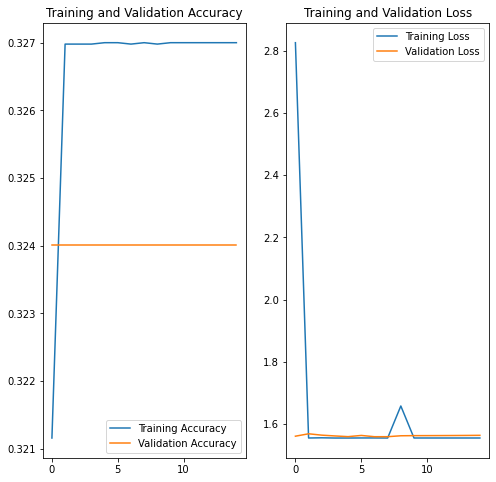

In [ ]:
#-------------------------------------------------------------------------------

print(cb_D006.times)
final_time = 0
for time in cb_D006.times:
  final_time += time
print('El entrenamiento se demoro: ' +str(final_time)+' segundos')
final_time= final_time/60
print('El entrenamiento se demoro: ' +str(final_time)+' minutos')
print('accuracy => '+ str(max(history_D006.history['accuracy'])))
print('loss => '+ str(min(history_D006.history['loss'])))
print('val_accuracy => '+ str(max(history_D006.history['val_accuracy'])))
print('val_loss => '+ str(min(history_D006.history['val_loss'])))

#-------------------------------------------------------------------------------

acc = history_D006.history['accuracy']
val_acc = history_D006.history['val_accuracy']

loss=history_D006.history['loss']
val_loss=history_D006.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Modelo DS002-D007

In [ ]:
#-------------------------------------------------------------------------------
cb_D007 = obtenerTimer()
num_classes = 5
epochs=15

model_D007 = Sequential([
  layers.Conv2D(4, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(8, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(8, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(16, activation='relu'),
  layers.Dense(num_classes)
])
model_D007.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# model_D007.summary()


history_D007 = model_D007.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[cb_D007]
)

#-------------------------------------------------------------------------------

Epoch 1/15
1497/1497 [==============================] - 111s 74ms/step - loss: 1.3413 - accuracy: 0.4215 - val_loss: 1.2413 - val_accuracy: 0.4641
Epoch 2/15
1497/1497 [==============================] - 111s 74ms/step - loss: 1.0798 - accuracy: 0.5712 - val_loss: 0.9330 - val_accuracy: 0.6322
Epoch 3/15
1497/1497 [==============================] - 112s 75ms/step - loss: 0.8855 - accuracy: 0.6534 - val_loss: 0.8032 - val_accuracy: 0.6909
Epoch 4/15
1497/1497 [==============================] - 112s 75ms/step - loss: 0.7615 - accuracy: 0.6938 - val_loss: 0.7301 - val_accuracy: 0.7055
Epoch 5/15
1497/1497 [==============================] - 112s 75ms/step - loss: 0.7002 - accuracy: 0.7182 - val_loss: 0.6820 - val_accuracy: 0.7271
Epoch 6/15
1497/1497 [==============================] - 112s 75ms/step - loss: 0.6403 - accuracy: 0.7449 - val_loss: 0.6522 - val_accuracy: 0.7460
Epoch 7/15
1497/1497 [==============================] - 113s 75ms/step - loss: 0.5925 - accuracy: 0.7705 - val_loss: 0

[111.45055842399597, 111.38452911376953, 112.20926475524902, 112.21682810783386, 111.96057748794556, 112.27479910850525, 112.74189496040344, 113.33799004554749, 112.05944800376892, 112.63994693756104, 111.91811037063599, 111.31032013893127, 111.66879224777222, 111.74914836883545, 111.94221925735474]
El entrenamiento se demoro: 1680.8644273281097 segundos
El entrenamiento se demoro: 28.01440712213516 minutos
accuracy => 0.8424282670021057
loss => 0.40728628635406494
val_accuracy => 0.792901873588562
val_loss => 0.5804027318954468


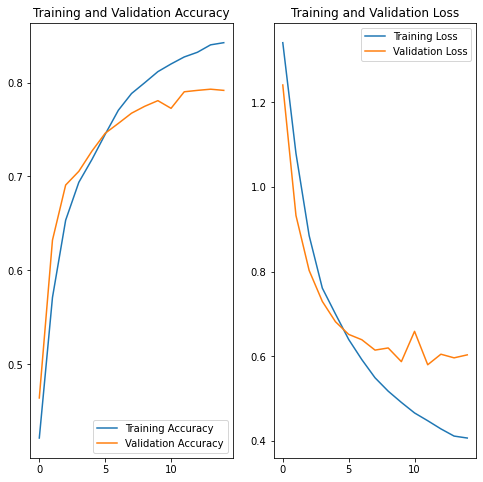

In [ ]:
#-------------------------------------------------------------------------------

print(cb_D007.times)
final_time = 0
for time in cb_D007.times:
  final_time += time
print('El entrenamiento se demoro: ' +str(final_time)+' segundos')
final_time= final_time/60
print('El entrenamiento se demoro: ' +str(final_time)+' minutos')
print('accuracy => '+ str(max(history_D007.history['accuracy'])))
print('loss => '+ str(min(history_D007.history['loss'])))
print('val_accuracy => '+ str(max(history_D007.history['val_accuracy'])))
print('val_loss => '+ str(min(history_D007.history['val_loss'])))

#-------------------------------------------------------------------------------

acc = history_D007.history['accuracy']
val_acc = history_D007.history['val_accuracy']

loss=history_D007.history['loss']
val_loss=history_D007.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Modelo DS002-D008

In [ ]:
#-------------------------------------------------------------------------------
cb_D008 = obtenerTimer()
num_classes = 5
epochs=10

model_D008 = Sequential([
  layers.Conv2D(8, 3, padding='same', activation='sigmoid'),
  layers.MaxPooling2D(),
  layers.Conv2D(16, 3, padding='same', activation='sigmoid'),
  layers.MaxPooling2D(),
  layers.Conv2D(16, 3, padding='same', activation='sigmoid'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(32, activation='sigmoid'),
  layers.Dense(num_classes)
])
model_D008.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# model_D008.summary()


history_D008 = model_D008.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[cb_D008]
)

#-------------------------------------------------------------------------------

Epoch 1/10
1497/1497 [==============================] - 122s 81ms/step - loss: 1.5682 - accuracy: 0.3237 - val_loss: 1.5580 - val_accuracy: 0.3240
Epoch 2/10
1497/1497 [==============================] - 122s 81ms/step - loss: 1.5567 - accuracy: 0.3270 - val_loss: 1.5579 - val_accuracy: 0.3240
Epoch 3/10
1497/1497 [==============================] - 122s 82ms/step - loss: 1.5566 - accuracy: 0.3270 - val_loss: 1.5581 - val_accuracy: 0.3240
Epoch 4/10
1497/1497 [==============================] - 122s 81ms/step - loss: 1.5566 - accuracy: 0.3270 - val_loss: 1.5582 - val_accuracy: 0.3240
Epoch 5/10
1497/1497 [==============================] - 123s 82ms/step - loss: 1.5567 - accuracy: 0.3270 - val_loss: 1.5578 - val_accuracy: 0.3240
Epoch 6/10
1497/1497 [==============================] - 124s 82ms/step - loss: 1.5567 - accuracy: 0.3270 - val_loss: 1.5579 - val_accuracy: 0.3240
Epoch 7/10
1497/1497 [==============================] - 124s 83ms/step - loss: 1.5567 - accuracy: 0.3270 - val_loss: 1

[121.86021685600281, 122.00996971130371, 122.47176957130432, 121.72834730148315, 122.88497805595398, 123.60556697845459, 124.20636940002441, 124.62177753448486, 123.63257026672363, 124.32423973083496]
El entrenamiento se demoro: 1851.597335100174 segundos
El entrenamiento se demoro: 30.8599555850029 minutos
accuracy => 0.3270009458065033
loss => 1.5565614700317383
val_accuracy => 0.32400834560394287
val_loss => 1.5577737092971802


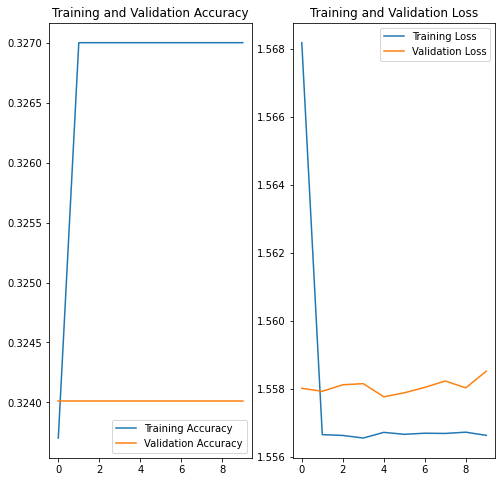

In [ ]:
#-------------------------------------------------------------------------------

print(cb_D008.times)
final_time = 0
for time in cb_D006.times:
  final_time += time
print('El entrenamiento se demoro: ' +str(final_time)+' segundos')
final_time= final_time/60
print('El entrenamiento se demoro: ' +str(final_time)+' minutos')
print('accuracy => '+ str(max(history_D008.history['accuracy'])))
print('loss => '+ str(min(history_D008.history['loss'])))
print('val_accuracy => '+ str(max(history_D008.history['val_accuracy'])))
print('val_loss => '+ str(min(history_D008.history['val_loss'])))

#-------------------------------------------------------------------------------

acc = history_D008.history['accuracy']
val_acc = history_D008.history['val_accuracy']

loss=history_D008.history['loss']
val_loss=history_D008.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Modelo DS002-D009

In [ ]:
#-------------------------------------------------------------------------------
cb_D009 = obtenerTimer()
num_classes = 5
epochs=10

model_D009 = Sequential([
  layers.Conv2D(8, 3, padding='same', activation='sigmoid'),
  layers.MaxPooling2D(),
  layers.Conv2D(16, 3, padding='same', activation='sigmoid'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(32, activation='sigmoid'),
  layers.Dense(num_classes)
])
model_D009.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# model_D009.summary()


history_D009 = model_D009.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[cb_D009]
)

#-------------------------------------------------------------------------------

Epoch 1/10
1497/1497 [==============================] - 121s 81ms/step - loss: 1.5679 - accuracy: 0.3270 - val_loss: 1.5579 - val_accuracy: 0.3240
Epoch 2/10
1497/1497 [==============================] - 123s 82ms/step - loss: 1.5565 - accuracy: 0.3270 - val_loss: 1.5579 - val_accuracy: 0.3240
Epoch 3/10
1497/1497 [==============================] - 124s 83ms/step - loss: 1.5565 - accuracy: 0.3270 - val_loss: 1.5580 - val_accuracy: 0.3240
Epoch 4/10
1497/1497 [==============================] - 124s 83ms/step - loss: 1.5564 - accuracy: 0.3270 - val_loss: 1.5580 - val_accuracy: 0.3240
Epoch 5/10
1497/1497 [==============================] - 124s 83ms/step - loss: 1.5566 - accuracy: 0.3270 - val_loss: 1.5578 - val_accuracy: 0.3240
Epoch 6/10
1497/1497 [==============================] - 124s 83ms/step - loss: 1.5565 - accuracy: 0.3270 - val_loss: 1.5578 - val_accuracy: 0.3240
Epoch 7/10
1497/1497 [==============================] - 125s 83ms/step - loss: 1.5565 - accuracy: 0.3270 - val_loss: 1

[121.32288265228271, 123.2496919631958, 123.9927990436554, 124.07117366790771, 124.12372517585754, 124.26516842842102, 124.78706097602844, 123.02212166786194, 125.62532353401184, 124.24617457389832]
El entrenamiento se demoro: 1238.7061216831207 segundos
El entrenamiento se demoro: 20.645102028052012 minutos
accuracy => 0.3270009458065033
loss => 1.5564169883728027
val_accuracy => 0.32400834560394287
val_loss => 1.557755947113037


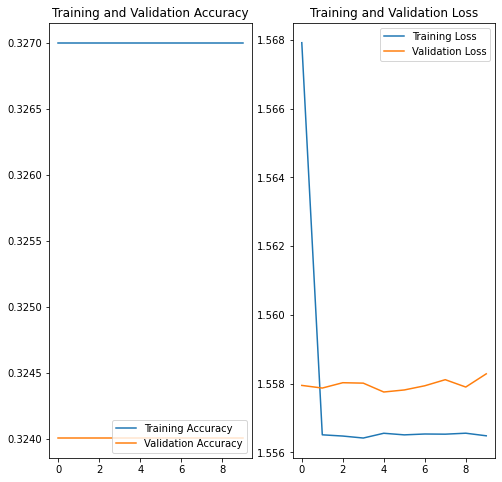

In [ ]:
#-------------------------------------------------------------------------------

print(cb_D009.times)
final_time = 0
for time in cb_D009.times:
  final_time += time
print('El entrenamiento se demoro: ' +str(final_time)+' segundos')
final_time= final_time/60
print('El entrenamiento se demoro: ' +str(final_time)+' minutos')
print('accuracy => '+ str(max(history_D009.history['accuracy'])))
print('loss => '+ str(min(history_D009.history['loss'])))
print('val_accuracy => '+ str(max(history_D009.history['val_accuracy'])))
print('val_loss => '+ str(min(history_D009.history['val_loss'])))

#-------------------------------------------------------------------------------

acc = history_D009.history['accuracy']
val_acc = history_D009.history['val_accuracy']

loss=history_D009.history['loss']
val_loss=history_D009.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Modelo DS002-D010

In [ ]:
#-------------------------------------------------------------------------------
cb_D010 = obtenerTimer()
num_classes = 5
epochs=10

model_D010 = Sequential([
  layers.Conv2D(4, 3, padding='same', activation='sigmoid'),
  layers.MaxPooling2D(),
  layers.Conv2D(8, 3, padding='same', activation='sigmoid'),
  layers.MaxPooling2D(),
  layers.Conv2D(8, 3, padding='same', activation='sigmoid'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(16, activation='sigmoid'),
  layers.Dense(num_classes)
])
model_D010.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# model_D010.summary()


history_D010 = model_D010.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[cb_D010]
)

#-------------------------------------------------------------------------------

Epoch 1/10
1497/1497 [==============================] - 123s 82ms/step - loss: 1.5567 - accuracy: 0.3276 - val_loss: 1.5576 - val_accuracy: 0.3240
Epoch 2/10
1497/1497 [==============================] - 124s 83ms/step - loss: 1.5558 - accuracy: 0.3270 - val_loss: 1.5575 - val_accuracy: 0.3240
Epoch 3/10
1497/1497 [==============================] - 125s 83ms/step - loss: 1.5558 - accuracy: 0.3270 - val_loss: 1.5576 - val_accuracy: 0.3240
Epoch 4/10
1497/1497 [==============================] - 126s 84ms/step - loss: 1.5558 - accuracy: 0.3270 - val_loss: 1.5575 - val_accuracy: 0.3240
Epoch 5/10
1497/1497 [==============================] - 125s 83ms/step - loss: 1.5558 - accuracy: 0.3270 - val_loss: 1.5576 - val_accuracy: 0.3240
Epoch 6/10
1497/1497 [==============================] - 124s 83ms/step - loss: 1.5558 - accuracy: 0.3270 - val_loss: 1.5576 - val_accuracy: 0.3240
Epoch 7/10
1497/1497 [==============================] - 124s 83ms/step - loss: 1.5558 - accuracy: 0.3270 - val_loss: 1

[122.89976453781128, 124.47099089622498, 125.03853964805603, 126.37878203392029, 125.18369817733765, 124.40022706985474, 124.342848777771, 124.86971163749695, 125.30875325202942, 125.97823405265808]
El entrenamiento se demoro: 1248.8715500831604 segundos
El entrenamiento se demoro: 20.81452583471934 minutos
accuracy => 0.32760635018348694
loss => 1.5557739734649658
val_accuracy => 0.32400834560394287
val_loss => 1.557516098022461


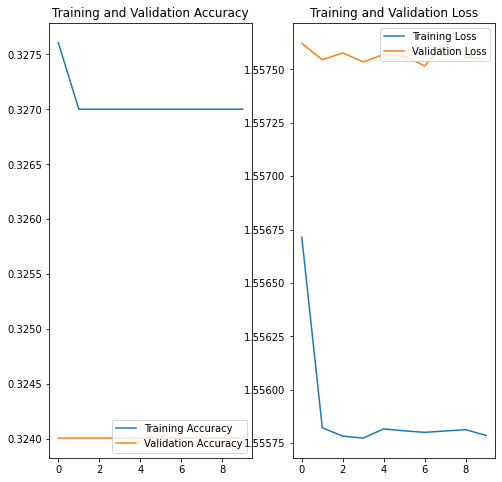

In [ ]:
#-------------------------------------------------------------------------------

print(cb_D010.times)
final_time = 0
for time in cb_D010.times:
  final_time += time
print('El entrenamiento se demoro: ' +str(final_time)+' segundos')
final_time= final_time/60
print('El entrenamiento se demoro: ' +str(final_time)+' minutos')
print('accuracy => '+ str(max(history_D010.history['accuracy'])))
print('loss => '+ str(min(history_D010.history['loss'])))
print('val_accuracy => '+ str(max(history_D010.history['val_accuracy'])))
print('val_loss => '+ str(min(history_D010.history['val_loss'])))

#-------------------------------------------------------------------------------

acc = history_D010.history['accuracy']
val_acc = history_D010.history['val_accuracy']

loss=history_D010.history['loss']
val_loss=history_D010.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Modelo DS002-D011

In [ ]:
#-------------------------------------------------------------------------------
cb_D011 = obtenerTimer()
num_classes = 5
epochs=15

model_D011 = Sequential([
  layers.Conv2D(8, 3, padding='same', activation='sigmoid'),
  layers.MaxPooling2D(),
  layers.Conv2D(16, 3, padding='same', activation='sigmoid'),
  layers.MaxPooling2D(),
  layers.Conv2D(16, 3, padding='same', activation='sigmoid'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(32, activation='sigmoid'),
  layers.Dense(num_classes)
])
model_D011.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# model_D011.summary()


history_D011 = model_D011.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[cb_D011]
)

#-------------------------------------------------------------------------------

Epoch 1/15
1497/1497 [==============================] - 112s 74ms/step - loss: 1.5591 - accuracy: 0.3269 - val_loss: 1.5580 - val_accuracy: 0.3240
Epoch 2/15
1497/1497 [==============================] - 113s 75ms/step - loss: 1.5567 - accuracy: 0.3270 - val_loss: 1.5579 - val_accuracy: 0.3240
Epoch 3/15
1497/1497 [==============================] - 112s 75ms/step - loss: 1.5566 - accuracy: 0.3270 - val_loss: 1.5581 - val_accuracy: 0.3240
Epoch 4/15
1497/1497 [==============================] - 113s 75ms/step - loss: 1.4496 - accuracy: 0.3797 - val_loss: 1.3164 - val_accuracy: 0.4428
Epoch 5/15
1497/1497 [==============================] - 112s 75ms/step - loss: 0.9750 - accuracy: 0.5966 - val_loss: 0.8090 - val_accuracy: 0.6767
Epoch 6/15
1497/1497 [==============================] - 113s 75ms/step - loss: 0.7786 - accuracy: 0.6793 - val_loss: 0.7603 - val_accuracy: 0.6829
Epoch 7/15
1497/1497 [==============================] - 112s 75ms/step - loss: 0.7085 - accuracy: 0.7093 - val_loss: 0

[112.22647404670715, 112.59009289741516, 112.31827139854431, 112.57419633865356, 112.0136992931366, 112.6926257610321, 112.30156707763672, 112.6013605594635, 112.96636533737183, 112.70514941215515, 113.19169354438782, 111.70833158493042, 111.7071635723114, 113.76930260658264, 111.9051582813263]
El entrenamiento se demoro: 1687.2714517116547 segundos
El entrenamiento se demoro: 28.12119086186091 minutos
accuracy => 0.860590398311615
loss => 0.3693428635597229
val_accuracy => 0.8330689072608948
val_loss => 0.4314082860946655


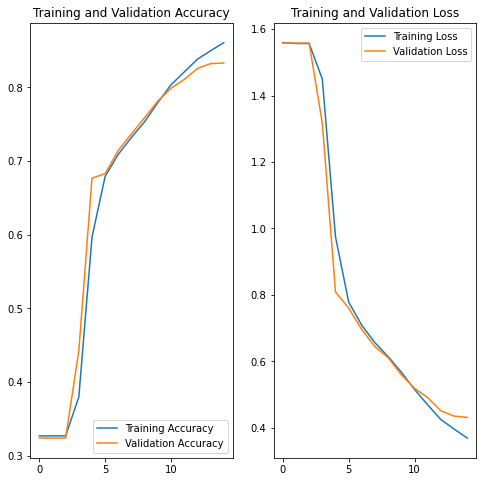

In [ ]:
#-------------------------------------------------------------------------------

print(cb_D011.times)
final_time = 0
for time in cb_D011.times:
  final_time += time
print('El entrenamiento se demoro: ' +str(final_time)+' segundos')
final_time= final_time/60
print('El entrenamiento se demoro: ' +str(final_time)+' minutos')
print('accuracy => '+ str(max(history_D011.history['accuracy'])))
print('loss => '+ str(min(history_D011.history['loss'])))
print('val_accuracy => '+ str(max(history_D011.history['val_accuracy'])))
print('val_loss => '+ str(min(history_D011.history['val_loss'])))

#-------------------------------------------------------------------------------

acc = history_D011.history['accuracy']
val_acc = history_D011.history['val_accuracy']

loss=history_D011.history['loss']
val_loss=history_D011.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Modelo DS002-D012

In [ ]:
#-------------------------------------------------------------------------------
cb_D012 = obtenerTimer()
num_classes = 5
epochs=15

model_D012 = Sequential([
  layers.Conv2D(8, 3, padding='same', activation='sigmoid'),
  layers.MaxPooling2D(),
  layers.Conv2D(16, 3, padding='same', activation='sigmoid'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(32, activation='sigmoid'),
  layers.Dense(num_classes)
])
model_D012.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# model_D012.summary()


history_D012 = model_D012.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[cb_D012]
)

#-------------------------------------------------------------------------------

Epoch 1/15
1497/1497 [==============================] - 125s 83ms/step - loss: 1.5657 - accuracy: 0.3269 - val_loss: 1.5582 - val_accuracy: 0.3240
Epoch 2/15
1497/1497 [==============================] - 126s 84ms/step - loss: 1.5569 - accuracy: 0.3270 - val_loss: 1.5581 - val_accuracy: 0.3240
Epoch 3/15
1497/1497 [==============================] - 130s 87ms/step - loss: 1.5569 - accuracy: 0.3270 - val_loss: 1.5583 - val_accuracy: 0.3240
Epoch 4/15
1497/1497 [==============================] - 131s 87ms/step - loss: 1.5568 - accuracy: 0.3270 - val_loss: 1.5584 - val_accuracy: 0.3240
Epoch 5/15
1497/1497 [==============================] - 130s 86ms/step - loss: 1.5570 - accuracy: 0.3270 - val_loss: 1.5578 - val_accuracy: 0.3240
Epoch 6/15
1497/1497 [==============================] - 129s 86ms/step - loss: 1.5569 - accuracy: 0.3270 - val_loss: 1.5580 - val_accuracy: 0.3240
Epoch 7/15
1497/1497 [==============================] - 129s 86ms/step - loss: 1.5570 - accuracy: 0.3270 - val_loss: 1

[124.82179737091064, 126.38406467437744, 130.4933853149414, 130.5540189743042, 129.6158800125122, 129.18012738227844, 129.4882264137268, 128.6579089164734, 128.442209482193, 127.51845860481262, 128.26542806625366, 127.63180589675903, 128.38952827453613, 129.45452308654785, 127.82494783401489]
El entrenamiento se demoro: 1926.7223103046417 segundos
El entrenamiento se demoro: 32.112038505077365 minutos
accuracy => 0.3270009458065033
loss => 1.5567855834960938
val_accuracy => 0.32400834560394287
val_loss => 1.5576097965240479


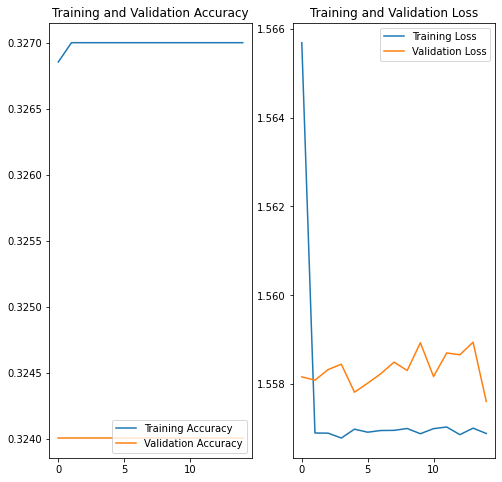

In [ ]:
#-------------------------------------------------------------------------------

print(cb_D012.times)
final_time = 0
for time in cb_D012.times:
  final_time += time
print('El entrenamiento se demoro: ' +str(final_time)+' segundos')
final_time= final_time/60
print('El entrenamiento se demoro: ' +str(final_time)+' minutos')
print('accuracy => '+ str(max(history_D012.history['accuracy'])))
print('loss => '+ str(min(history_D012.history['loss'])))
print('val_accuracy => '+ str(max(history_D012.history['val_accuracy'])))
print('val_loss => '+ str(min(history_D012.history['val_loss'])))

#-------------------------------------------------------------------------------

acc = history_D012.history['accuracy']
val_acc = history_D012.history['val_accuracy']

loss=history_D012.history['loss']
val_loss=history_D012.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Modelo DS002-D013

In [ ]:
#-------------------------------------------------------------------------------
cb_D013 = obtenerTimer()
num_classes = 5
epochs=15

model_D013 = Sequential([
  layers.Conv2D(4, 3, padding='same', activation='sigmoid'),
  layers.MaxPooling2D(),
  layers.Conv2D(8, 3, padding='same', activation='sigmoid'),
  layers.MaxPooling2D(),
  layers.Conv2D(8, 3, padding='same', activation='sigmoid'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(16, activation='sigmoid'),
  layers.Dense(num_classes)
])
model_D013.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# model_D013.summary()


history_D013 = model_D013.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[cb_D013]
)

#-------------------------------------------------------------------------------

Epoch 1/15
1497/1497 [==============================] - 124s 83ms/step - loss: 1.5592 - accuracy: 0.3253 - val_loss: 1.5577 - val_accuracy: 0.3240
Epoch 2/15
1497/1497 [==============================] - 127s 85ms/step - loss: 1.5560 - accuracy: 0.3270 - val_loss: 1.5577 - val_accuracy: 0.3240
Epoch 3/15
1497/1497 [==============================] - 125s 83ms/step - loss: 1.5559 - accuracy: 0.3270 - val_loss: 1.5577 - val_accuracy: 0.3240
Epoch 4/15
1497/1497 [==============================] - 126s 84ms/step - loss: 1.5562 - accuracy: 0.3270 - val_loss: 1.5577 - val_accuracy: 0.3240
Epoch 5/15
1497/1497 [==============================] - 125s 83ms/step - loss: 1.5561 - accuracy: 0.3270 - val_loss: 1.5577 - val_accuracy: 0.3240
Epoch 6/15
1497/1497 [==============================] - 127s 84ms/step - loss: 1.5561 - accuracy: 0.3270 - val_loss: 1.5576 - val_accuracy: 0.3240
Epoch 7/15
1497/1497 [==============================] - 129s 86ms/step - loss: 1.5560 - accuracy: 0.3270 - val_loss: 1

[124.43910765647888, 127.03773403167725, 125.31149339675903, 125.74100112915039, 124.72488617897034, 126.74991655349731, 129.16709685325623, 130.2054419517517, 129.89978075027466, 129.84704303741455, 128.3389871120453, 129.38631534576416, 129.7142927646637, 129.63658618927002, 129.90723729133606]
El entrenamiento se demoro: 1920.1069202423096 segundos
El entrenamiento se demoro: 32.001782004038496 minutos
accuracy => 0.3270009458065033
loss => 1.555930733680725
val_accuracy => 0.32400834560394287
val_loss => 1.5575531721115112


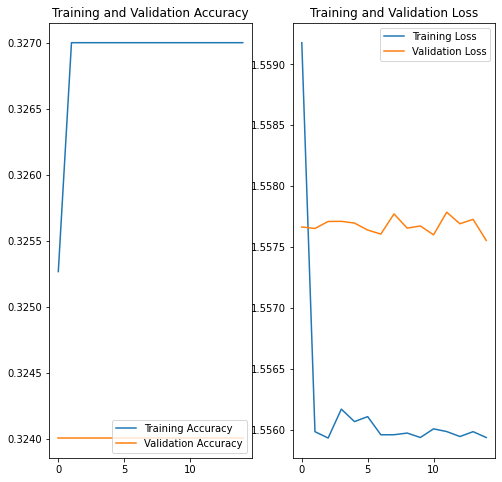

In [ ]:
#-------------------------------------------------------------------------------

print(cb_D013.times)
final_time = 0
for time in cb_D013.times:
  final_time += time
print('El entrenamiento se demoro: ' +str(final_time)+' segundos')
final_time= final_time/60
print('El entrenamiento se demoro: ' +str(final_time)+' minutos')
print('accuracy => '+ str(max(history_D013.history['accuracy'])))
print('loss => '+ str(min(history_D013.history['loss'])))
print('val_accuracy => '+ str(max(history_D013.history['val_accuracy'])))
print('val_loss => '+ str(min(history_D013.history['val_loss'])))

#-------------------------------------------------------------------------------

acc = history_D013.history['accuracy']
val_acc = history_D013.history['val_accuracy']

loss=history_D013.history['loss']
val_loss=history_D013.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Modelo DS002-D011 - test

In [ ]:
#-------------------------------------------------------------------------------
cb_D011 = obtenerTimer()
num_classes = 5
epochs=30

model_D011 = Sequential([
  layers.Conv2D(8, 3, padding='same', activation='sigmoid'),
  layers.MaxPooling2D(),
  layers.Conv2D(16, 3, padding='same', activation='sigmoid'),
  layers.MaxPooling2D(),
  layers.Conv2D(16, 3, padding='same', activation='sigmoid'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(32, activation='sigmoid'),
  layers.Dense(num_classes)
])
model_D011.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# model_D011.summary()


history_D011 = model_D011.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[cb_D011]
)

#-------------------------------------------------------------------------------

Epoch 1/30
1497/1497 [==============================] - 130s 86ms/step - loss: 1.5601 - accuracy: 0.3268 - val_loss: 1.5580 - val_accuracy: 0.3240
Epoch 2/30
1497/1497 [==============================] - 126s 84ms/step - loss: 1.5565 - accuracy: 0.3270 - val_loss: 1.5579 - val_accuracy: 0.3240
Epoch 3/30
1497/1497 [==============================] - 127s 84ms/step - loss: 1.5570 - accuracy: 0.3270 - val_loss: 1.5580 - val_accuracy: 0.3240
Epoch 4/30
1497/1497 [==============================] - 126s 84ms/step - loss: 1.5563 - accuracy: 0.3270 - val_loss: 1.5580 - val_accuracy: 0.3240
Epoch 5/30
1497/1497 [==============================] - 126s 84ms/step - loss: 1.5565 - accuracy: 0.3270 - val_loss: 1.5577 - val_accuracy: 0.3240
Epoch 6/30
1497/1497 [==============================] - 127s 84ms/step - loss: 1.5564 - accuracy: 0.3270 - val_loss: 1.5578 - val_accuracy: 0.3240
Epoch 7/30
1497/1497 [==============================] - 126s 84ms/step - loss: 1.5565 - accuracy: 0.3270 - val_loss: 1

[129.70736598968506, 126.42305874824524, 126.78809380531311, 126.32266974449158, 126.42505097389221, 126.79989051818848, 126.1209192276001, 127.1863317489624, 126.91676712036133, 127.39530825614929, 126.99671792984009, 125.68135905265808, 127.28213834762573, 126.37794137001038, 126.94786167144775, 125.75067782402039, 126.75339698791504, 125.39091038703918, 124.01099872589111, 130.64368152618408, 130.2270438671112, 131.22216248512268, 130.79039430618286, 130.8626091480255, 132.04883193969727, 132.23390555381775, 130.87114810943604, 131.02723097801208, 129.89553546905518, 131.0103621482849]
El entrenamiento se demoro: 3846.110363960266 segundos
El entrenamiento se demoro: 64.10183939933776 minutos
accuracy => 0.3270009458065033
loss => 1.5562548637390137
val_accuracy => 0.32400834560394287
val_loss => 1.5575772523880005


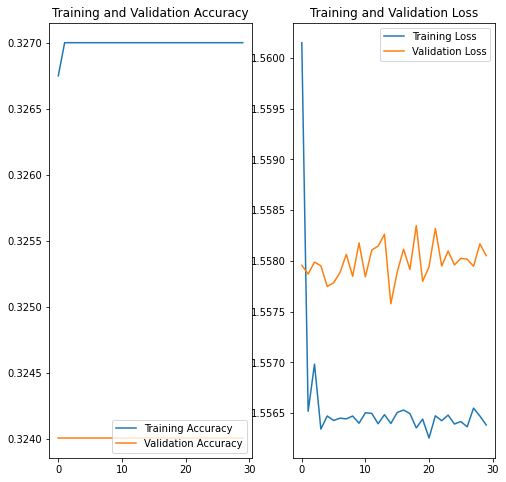

In [ ]:
#-------------------------------------------------------------------------------

print(cb_D011.times)
final_time = 0
for time in cb_D011.times:
  final_time += time
print('El entrenamiento se demoro: ' +str(final_time)+' segundos')
final_time= final_time/60
print('El entrenamiento se demoro: ' +str(final_time)+' minutos')
print('accuracy => '+ str(max(history_D011.history['accuracy'])))
print('loss => '+ str(min(history_D011.history['loss'])))
print('val_accuracy => '+ str(max(history_D011.history['val_accuracy'])))
print('val_loss => '+ str(min(history_D011.history['val_loss'])))

#-------------------------------------------------------------------------------

acc = history_D011.history['accuracy']
val_acc = history_D011.history['val_accuracy']

loss=history_D011.history['loss']
val_loss=history_D011.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()